In [22]:
#Shaquiel Pashtunyar
#DSC540
#Week 5 and 6 excercise

In [23]:
#Get beautiful Soup

import requests as r
import pandas as pd
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [24]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
page = r.get(url)

In [25]:
soup = BeautifulSoup(page.content,'html.parser')

In [26]:
#Parsed out html page using bs4
soup.head()

[<meta charset="utf-8"/>,
 <title>List of countries by GDP (nominal) - Wikipedia</title>,
 <script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"621818f8-5ed1-4dc4-92c7-7d4d3f08fcf6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":1114178440,"wgRevisionId":1114178440,"wgArticleId":380845,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Articles with short description","Short description is different from Wikidata","Wikipedia indefinitely semi-protec

In [27]:
#find the number of tables using the soup find
tables = soup.find('table', class_='wikitable')

In [28]:
print(len(tables))

4


In [29]:
#7 total tables, but 4 wiki tables. We care about the wikitables

In [30]:
#the table is a bs4 element
print(type(tables)) 

<class 'bs4.element.Tag'>


In [31]:
df = pd.read_html(str(tables))

In [32]:
df

[    Country/Territory UN Region IMF[1][13]            United Nations[14]  \
     Country/Territory UN Region   Estimate       Year           Estimate   
 0               World         —   93863851       2021           87461674   
 1       United States  Americas   25346805       2022           20893746   
 2               China      Asia   19911593  [n 2]2022           14722801   
 3               Japan      Asia    4912147       2022            5057759   
 4             Germany    Europe    4256540       2022            3846414   
 ..                ...       ...        ...        ...                ...   
 212             Palau   Oceania        244       2022                264   
 213          Kiribati   Oceania        216       2022                181   
 214             Nauru   Oceania        134       2022                135   
 215        Montserrat  Americas          —          —                 68   
 216            Tuvalu   Oceania         66       2022                 55   

In [33]:
#we have three different tables merged on this main table that we can split out

In [34]:
#make into a more structured data frame
dft = df[0]
dft

Country/Territory UN Region IMF[1][13]            United Nations[14]  \
    Country/Territory UN Region   Estimate       Year           Estimate   
0               World         —   93863851       2021           87461674   
1       United States  Americas   25346805       2022           20893746   
2               China      Asia   19911593  [n 2]2022           14722801   
3               Japan      Asia    4912147       2022            5057759   
4             Germany    Europe    4256540       2022            3846414   
..                ...       ...        ...        ...                ...   
212             Palau   Oceania        244       2022                264   
213          Kiribati   Oceania        216       2022                181   
214             Nauru   Oceania        134       2022                135   
215        Montserrat  Americas          —          —                 68   
216            Tuvalu   Oceania         66       2022                 55   

               World Bank[15]        
          Year       Estimate  Year  
0         2020       96100091  2021  
1         2020       22996100  2021  
2    [n 3]2020       17734063  2021  
3         2020        4937422  2021  
4         2020        4223116  2021  
..         ...            ...   ...  
212       2020            258  2020  
213       2020            181  2020  
214       2020            133  2021  
215       2020              —     —  
216       2020             63  2021  

[217 rows x 8 columns]

In [35]:
#Extract the subset of just the IMF Data
dfIMF = dft[['Country/Territory', 'UN Region', 'IMF[1][13]']]
dfIMF

Country/Territory UN Region IMF[1][13]           
    Country/Territory UN Region   Estimate       Year
0               World         —   93863851       2021
1       United States  Americas   25346805       2022
2               China      Asia   19911593  [n 2]2022
3               Japan      Asia    4912147       2022
4             Germany    Europe    4256540       2022
..                ...       ...        ...        ...
212             Palau   Oceania        244       2022
213          Kiribati   Oceania        216       2022
214             Nauru   Oceania        134       2022
215        Montserrat  Americas          —          —
216            Tuvalu   Oceania         66       2022

[217 rows x 4 columns]

In [36]:
#Repeat the steps to get the other data source table
dfUN = dft[['Country/Territory', 'UN Region', 'United Nations[14]']]
dfUN

Country/Territory UN Region United Nations[14]           
    Country/Territory UN Region           Estimate       Year
0               World         —           87461674       2020
1       United States  Americas           20893746       2020
2               China      Asia           14722801  [n 3]2020
3               Japan      Asia            5057759       2020
4             Germany    Europe            3846414       2020
..                ...       ...                ...        ...
212             Palau   Oceania                264       2020
213          Kiribati   Oceania                181       2020
214             Nauru   Oceania                135       2020
215        Montserrat  Americas                 68       2020
216            Tuvalu   Oceania                 55       2020

[217 rows x 4 columns]

In [37]:
#Repeat the steps to get the other data source table
dfWB = dft[['Country/Territory', 'UN Region', 'World Bank[15]']]
dfWB

Country/Territory UN Region World Bank[15]      
    Country/Territory UN Region       Estimate  Year
0               World         —       96100091  2021
1       United States  Americas       22996100  2021
2               China      Asia       17734063  2021
3               Japan      Asia        4937422  2021
4             Germany    Europe        4223116  2021
..                ...       ...            ...   ...
212             Palau   Oceania            258  2020
213          Kiribati   Oceania            181  2020
214             Nauru   Oceania            133  2021
215        Montserrat  Americas              —     —
216            Tuvalu   Oceania             63  2021

[217 rows x 4 columns]

In [38]:
#Activity 8

In [39]:
#get the visit data
visitdata =pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Lesson06/Activity08/visit_data.csv')
visitdata.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [40]:
visitdata.shape

(1000, 7)

In [41]:
#Duplicate check on each column
print('ID dups: ', any(visitdata.id.duplicated()))
print('first_name dups: ', any(visitdata.first_name.duplicated()))
print('last_name dups: ', any(visitdata.last_name.duplicated()))
print('email dups: ', any(visitdata.email.duplicated()))
print('gender dups: ', any(visitdata.gender.duplicated()))
print('ip_address dups: ', any(visitdata.ip_address.duplicated()))
print('visit dups: ', any(visitdata.visit.duplicated()))

ID dups:  False
first_name dups:  True
last_name dups:  True
email dups:  False
gender dups:  True
ip_address dups:  False
visit dups:  True


In [42]:
#there are duplicates in 4 out of 6 of my columns

In [43]:
#NaN check
print('id have nulls: ', visitdata.id.isnull().values.any())
print('first_name have nulls: ', visitdata.first_name.isnull().values.any())
print('last_name have nulls: ', visitdata.last_name.isnull().values.any())
print('email have nulls: ', visitdata.email.isnull().values.any())
print('gender have nulls: ', visitdata.gender.isnull().values.any())
print('ip_address have nulls: ', visitdata.ip_address.isnull().values.any())
print('visit have nulls: ', visitdata.visit.isnull().values.any())

id have nulls:  False
first_name have nulls:  True
last_name have nulls:  True
email have nulls:  False
gender have nulls:  True
ip_address have nulls:  False
visit have nulls:  True


In [44]:
#All my duplicate columns also have NaN

In [45]:
cleaned = visitdata[np.isfinite(visitdata['visit'])]
cleaned.shape

(974, 7)

In [46]:
#a reduction of 26 rows

In [47]:
print('visit have nulls: ', cleaned.visit.isnull().values.any())

visit have nulls:  False


In [48]:
#now I dont have null values

In [49]:
#size dif of 26 rows 
print('Before size is: ', visitdata.shape)
print('After size is: ', cleaned.shape)

Before size is:  (1000, 7)
After size is:  (974, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x287095d7d00>,
 'caps': [<matplotlib.lines.Line2D at 0x287095f73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x287095d7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x287095f7880>],
 'fliers': [<matplotlib.lines.Line2D at 0x287095f7b50>],
 'means': []}

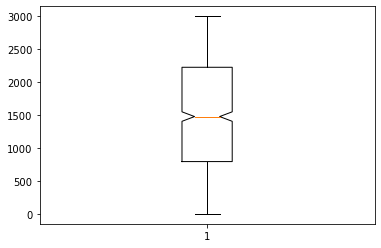

In [50]:
#Box plot of outliers
plt.boxplot(cleaned.visit, notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x28709dd4460>,
 'caps': [<matplotlib.lines.Line2D at 0x28709dd4a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x28709dd4160>],
 'medians': [<matplotlib.lines.Line2D at 0x28709dd4f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28709ddd220>],
 'means': []}

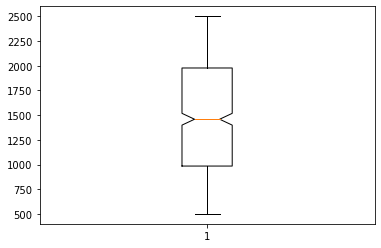

In [53]:
#Get rid of any other outliers
vd3 = cleaned[(cleaned['visit'] <=2500) & (cleaned['visit'] >=500)]
plt.boxplot(vd3.visit, notch=True)

In [54]:
vd3.shape

(686, 7)

In [55]:
#drastic reduction when removing values past 500 and 2500

In [56]:
#SQL Lite assignment

In [57]:
import sqlite3 as sql

In [58]:
#create table with columns
query = """
CREATE TABLE test1
(Name VARCHAR(20), Address VARCHAR(20),
CITY VARCHAR(20), State VARCHAR(20), Zip VARCHAR(20), Phone VARCHAR(20));"""

In [59]:
con = sql.connect('mydata.sqllite')

In [60]:
con.execute(query)

OperationalError: table test1 already exists

In [61]:
con.commit()

In [155]:
#create my data
Data = [('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234') , ('shaq2', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq3', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq4', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq5', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq6', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq7', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq8', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234') ,('shaq9', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'), ('shaq10', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234')]

In [141]:
Data

[('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq2', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq3', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq4', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq5', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq6', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq7', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq8', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq9', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq10', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234')]

In [143]:
putin = 'INSERT INTO test1 VALUES(?,?,?,?,?,?)'

In [156]:
#Put my data into my test 1 table
con.executemany(putin, Data)

In [146]:
cursor = con.execute ('select * from test1')
cursor

In [148]:
rows = cursor.fetchall()

In [149]:
rows

[('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq2', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq3', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq4', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq1', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq5', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq6', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq7', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq8', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq9', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234'),
 ('shaq10', 'shaqington', 'Shaq City', 'CA', '95124', '408-213-1234')]

In [157]:
#Dataframe of results from SQL
pd.DataFrame(rows,columns = [x[0] for x in cursor.description])

,Name,Address,CITY,State,Zip,Phone
0,shaq1,shaqington,Shaq City,CA,95124,408-213-1234
1,shaq2,shaqington,Shaq City,CA,95124,408-213-1234
2,shaq3,shaqington,Shaq City,CA,95124,408-213-1234
3,shaq4,shaqington,Shaq City,CA,95124,408-213-1234
4,shaq1,shaqington,Shaq City,CA,95124,408-213-1234
5,shaq5,shaqington,Shaq City,CA,95124,408-213-1234
6,shaq6,shaqington,Shaq City,CA,95124,408-213-1234
7,shaq7,shaqington,Shaq City,CA,95124,408-213-1234
8,shaq8,shaqington,Shaq City,CA,95124,408-213-1234
9,shaq9,shaqington,Shaq City,CA,95124,408-213-1234
